<a href="https://colab.research.google.com/github/Syaroful/syaroful-ml-semester-5/blob/main/09%20-%20Perceptron%20dan%20ANN/tugas_praktikum.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Langkah 1 - Import Library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
from collections import Counter
import seaborn as sns

### **Langkah 2 - Load MNIST Dataset**

In [2]:
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

### **Langkah 3 - Data Processing**

Counter({1: 7877, 7: 7293, 3: 7141, 2: 6990, 9: 6958, 0: 6903, 6: 6876, 8: 6825, 4: 6824, 5: 6313})


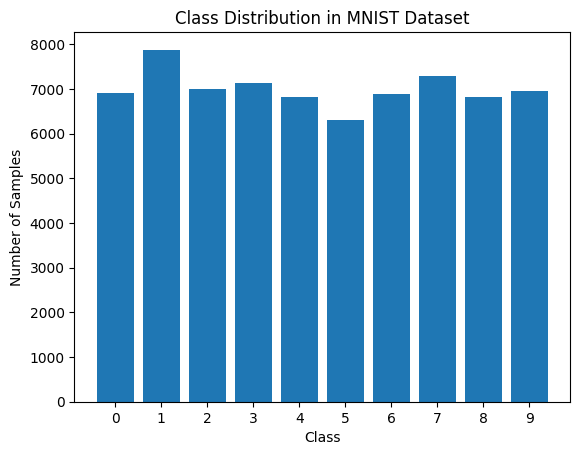

In [4]:
x, y = mnist.data, mnist.target.astype(int)
class_counts = Counter(y)
print(class_counts)
counts = [class_counts[i] for i in range(10)]
class_labels = [str(i) for i in range(10)]

plt.bar(class_labels, counts)
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.title('Class Distribution in MNIST Dataset')
plt.show()

### **Langkah 4 - Split Data**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

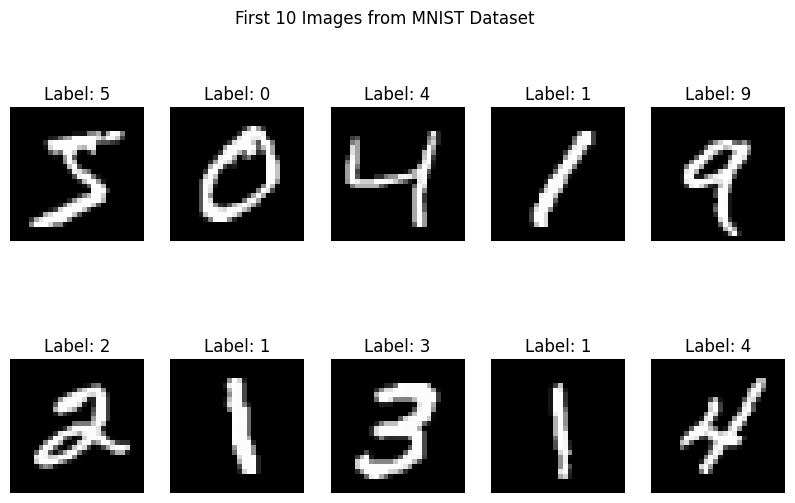

In [6]:
x_convert = X.values.astype(int)

plt.figure(figsize=(10, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_convert[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y[i]}")
    plt.axis('off')  # Turn off axis labels

plt.suptitle('First 10 Images from MNIST Dataset')
plt.show()

### **Langkah 5 - Normalisasi**

In [7]:
X_train = tf.keras.utils.normalize(X_train, axis=1)
X_test = tf.keras.utils.normalize(X_test, axis=1)

X_train = X_train / 255.0
X_test = X_test / 255.0

### **Langkah 6 - ANN Modeling**

In [8]:
ann = tf.keras.models.Sequential()

### **Langkah 7 - Building Layer**

In [9]:
ann.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784, )))
ann.add(tf.keras.layers.Dense(units=128, activation='relu'))
ann.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [10]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### **Langkah 8 - Compiling ANN Model**

In [11]:
ann.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### **Langkah 9 - Fitting**

In [12]:
ann.fit(X_train, y_train, epochs=50, batch_size=100, validation_data=(X_test, y_test))

Epoch 1/50
560/560 [==============================] - 11s 17ms/step - loss: 1.9606 - accuracy: 0.2853 - val_loss: 1.3794 - val_accuracy: 0.5056
Epoch 2/50
560/560 [==============================] - 7s 13ms/step - loss: 1.2100 - accuracy: 0.5554 - val_loss: 1.0957 - val_accuracy: 0.6109
Epoch 3/50
560/560 [==============================] - 8s 14ms/step - loss: 1.0384 - accuracy: 0.6433 - val_loss: 0.9502 - val_accuracy: 0.6860
Epoch 4/50
560/560 [==============================] - 6s 10ms/step - loss: 0.8913 - accuracy: 0.7116 - val_loss: 0.8081 - val_accuracy: 0.7414
Epoch 5/50
560/560 [==============================] - 6s 11ms/step - loss: 0.7646 - accuracy: 0.7571 - val_loss: 0.7088 - val_accuracy: 0.7754
Epoch 6/50
560/560 [==============================] - 6s 10ms/step - loss: 0.6907 - accuracy: 0.7840 - val_loss: 0.6632 - val_accuracy: 0.7872
Epoch 7/50
560/560 [==============================] - 5s 9ms/step - loss: 0.6472 - accuracy: 0.8004 - val_loss: 0.6218 - val_accuracy: 0.8044

### **Langkah 10 - Evaluating**

In [13]:
loss, accuracy = ann.evaluate(X_test, y_test)

print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")

438/438 [==============================] - 2s 3ms/step - loss: 0.2026 - accuracy: 0.9389
Loss: 0.20262344181537628
Accuracy: 0.9389285445213318


### **Langkah 11 - Confusion Matrics**

438/438 [==============================] - 1s 3ms/step


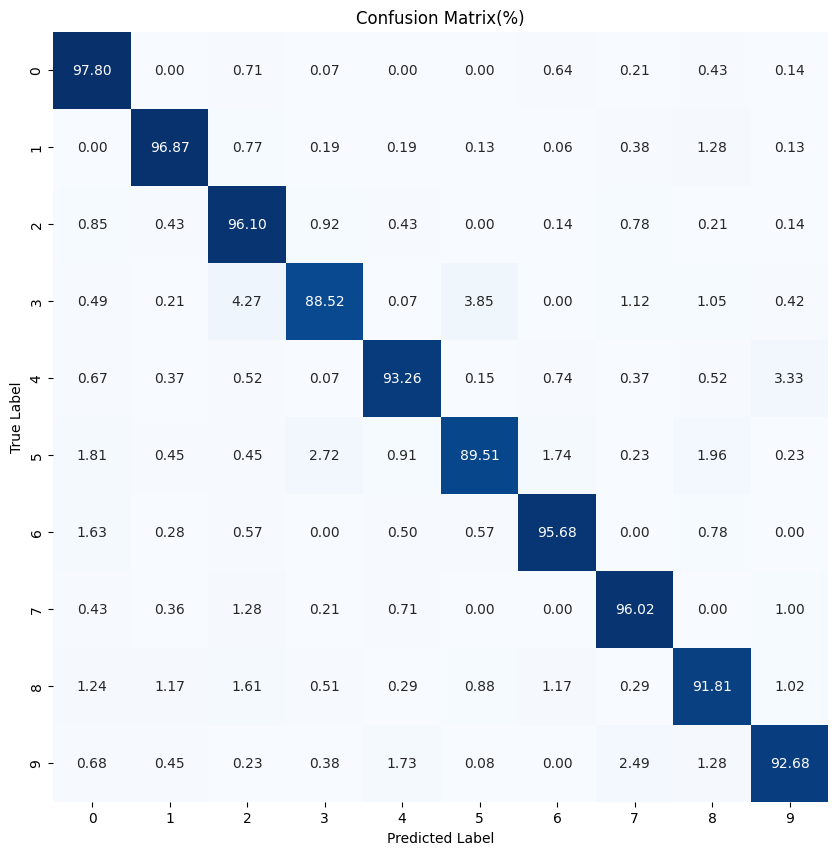

In [14]:
y_pred = ann.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

cm = confusion_matrix(y_test, y_pred)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(cm_percent, annot=True, ax=ax, cmap='Blues', fmt='.2f', cbar=False)
ax.set_xlabel('Predicted Label')
ax.set_ylabel('True Label')
ax.set_title('Confusion Matrix(%)')

class_names = [str(i) for i in range(10)]
ax.xaxis.set_ticklabels(class_names)
ax.yaxis.set_ticklabels(class_names)

plt.show()